## TP 4 : Méthode des éléments finis

In [7]:
import numpy as np
import scipy.sparse as spsp
import scipy.sparse.linalg as spsplin
import matplotlib.pyplot as plt

### Partie 1. (Elements finis P1)

In [5]:
class mesh:
    def __init__(self, Nel, xmin=0.0, xmax=1.0):
        self.Nel = Nel
        self.Ndof = Nel + 1
        self.xmin = 0.0
        self.xmax = 1.0
        self.nodes = np.empty(Nel + 1)
        self.h = np.empty(Nel)

    def init_uniform(self):
        self.nodes = np.linspace(self.xmin, self.xmax, self.Ndof)
        self.h = np.diff(self.nodes)

    def init_random(self):
        self.nodes = self.xmin + (self.xmax - self.xmin) * np.random.rand(self.Ndof)
        self.nodes[0] = self.xmin
        self.nodes[1] = self.xmax
        self.nodes.sort()
        self.h = np.diff(self.nodes)

    def test(self):
        self.init_uniform()
        print("Nodes:", self.nodes)
        print("Element sizes:", self.h)

mh = mesh(4, 0, 1)
mh.test()

Nodes: [0.   0.25 0.5  0.75 1.  ]
Element sizes: [0.25 0.25 0.25 0.25]


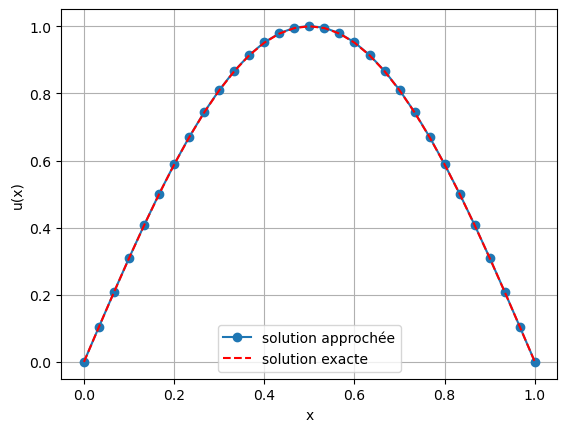

In [6]:
class fem:
    def __init__(self, mesh):
        self.mesh = mesh

    def matrixA_P1(self):
        h = self.mesh.h

        diagK = (1/h[:-1] + 1/h[1:])
        offdiagK = -1/h[1:-1]

        diagM = (h[:-1] + h[1:]) / 3.0
        offdiagM = h[1:-1] / 6.0

        diagA = diagK + diagM
        offdiagA = offdiagK + offdiagM

        A = spsp.diags([offdiagA, diagA, offdiagA], offsets=[-1,0,1], format='csr')

        return A

    def rhs_P1(self,f):
        nodes = self.mesh.nodes
        h = self.mesh.h
        Ndof = self.mesh.Ndof
        b = np.zeros(Ndof)

        for i in range(self.mesh.Nel):
            x_left = nodes[i]
            x_right = nodes[i+1]

            b[i] += h[i] * f(x_left) / 2.0
            b[i+1] += h[i] * f(x_right) / 2.0

        return b[1:-1]
    
    def solve(self, f, plot=True):
        A = self.matrixA_P1()
        b = self.rhs_P1(f)

        uu = spsplin.spsolve(A, b)

        Ndof = self.mesh.Ndof
        u = np.zeros(Ndof)
        u[1:-1] = uu

        if plot:
            x = self.mesh.nodes

            test_val = f(0.5)
            u_exact = np.sin(np.pi*x)

            plt.figure()
            plt.plot(x, u, 'o-', label='solution approchée')
            plt.plot(x, u_exact, 'r--', label='solution exacte')
            plt.xlabel('x')
            plt.ylabel('u(x)')
            plt.legend()
            plt.grid(True)
            plt.show()

        return u

mh = mesh(30, 0, 1)
mh.init_uniform()
fe = fem(mh)

A = fe.matrixA_P1()

# print(A.toarray())

def f_test(x):
    return (np.pi**2+1)*np.sin(np.pi*x)

u_approx = fe.solve(f_test, plot=True)

### Partie 2. (Etude)